In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('Credit Default Dataset.csv')

In [3]:
data

,ID,SALARY,SEX,EDUCATION,MARRIAGE,AGE,AVERAGE PAYMENT DELAY,DEFAULT
0,1,"20,000.00",2,2,1,24,2,1
1,2,"120,000.00",2,2,2,26,-1,1
2,3,"90,000.00",2,2,2,34,0,0
3,4,"50,000.00",2,2,1,37,0,0
4,5,"50,000.00",1,2,1,57,-1,0
...,...,...,...,...,...,...,...,...
29158,29996,"220,000.00",1,3,1,39,0,0
29159,29997,"150,000.00",1,3,2,43,-1,0
29160,29998,"30,000.00",1,2,2,37,4,1
29161,29999,"80,000.00",1,3,1,41,1,1


0    22649
1     6514
Name: DEFAULT, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


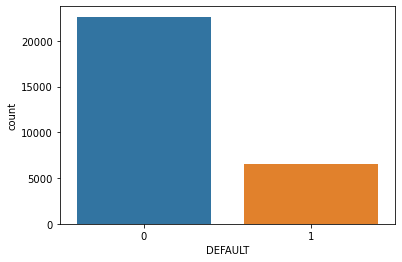

In [4]:
p = data['DEFAULT']
print(p.value_counts())
sns.countplot(p);

### This dataset is imbalance - the number of Defaulters is far more than number of non-defaulters. This might potentially affect the performance of the model

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29163 entries, 0 to 29162
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     29163 non-null  int64 
 1   SALARY                 29163 non-null  object
 2   SEX                    29163 non-null  int64 
 3   EDUCATION              29163 non-null  int64 
 4   MARRIAGE               29163 non-null  int64 
 5   AGE                    29163 non-null  int64 
 6   AVERAGE PAYMENT DELAY  29163 non-null  int64 
 7   DEFAULT                29163 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.7+ MB


In [6]:
data.describe()

,ID,SEX,EDUCATION,MARRIAGE,AGE,AVERAGE PAYMENT DELAY,DEFAULT
count,29163.000000,29163.000000,29163.000000,29163.000000,29163.000000,29163.000000,29163.000000
mean,14973.207626,1.603093,1.802455,1.539656,35.390563,-0.014882,0.223365
std,8657.500199,0.489265,0.696896,0.498433,9.181333,1.125631,0.416508
min,1.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,0.000000
25%,7489.500000,1.000000,1.000000,1.000000,28.000000,-1.000000,0.000000
50%,14953.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000
75%,22459.500000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000
max,30000.000000,2.000000,3.000000,2.000000,79.000000,8.000000,1.000000


## Data Preprocessing

In [7]:
data['AVERAGE PAYMENT DELAY'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [8]:
data['SALARY'] = data['SALARY'].str.replace(',', '')
data['SALARY'] = data['SALARY'].astype(float)
data['AVERAGE PAYMENT DELAY'] = data['AVERAGE PAYMENT DELAY'].replace(0,-1)
data['AVERAGE PAYMENT DELAY'] = data['AVERAGE PAYMENT DELAY'].replace(-2,-1)

In [9]:
data

,ID,SALARY,SEX,EDUCATION,MARRIAGE,AGE,AVERAGE PAYMENT DELAY,DEFAULT
0,1,20000.0,2,2,1,24,2,1
1,2,120000.0,2,2,2,26,-1,1
2,3,90000.0,2,2,2,34,-1,0
3,4,50000.0,2,2,1,37,-1,0
4,5,50000.0,1,2,1,57,-1,0
...,...,...,...,...,...,...,...,...
29158,29996,220000.0,1,3,1,39,-1,0
29159,29997,150000.0,1,3,2,43,-1,0
29160,29998,30000.0,1,2,2,37,4,1
29161,29999,80000.0,1,3,1,41,1,1


In [10]:
data = pd.get_dummies(data,columns = ['SEX','MARRIAGE'],prefix_sep = '-',drop_first=True)

In [11]:
data

,ID,SALARY,EDUCATION,AGE,AVERAGE PAYMENT DELAY,DEFAULT,SEX-2,MARRIAGE-2
0,1,20000.0,2,24,2,1,1,0
1,2,120000.0,2,26,-1,1,1,1
2,3,90000.0,2,34,-1,0,1,1
3,4,50000.0,2,37,-1,0,1,0
4,5,50000.0,2,57,-1,0,0,0
...,...,...,...,...,...,...,...,...
29158,29996,220000.0,3,39,-1,0,0,0
29159,29997,150000.0,3,43,-1,0,0,1
29160,29998,30000.0,2,37,4,1,0,1
29161,29999,80000.0,3,41,1,1,0,0


## Feature Selection

<AxesSubplot:>

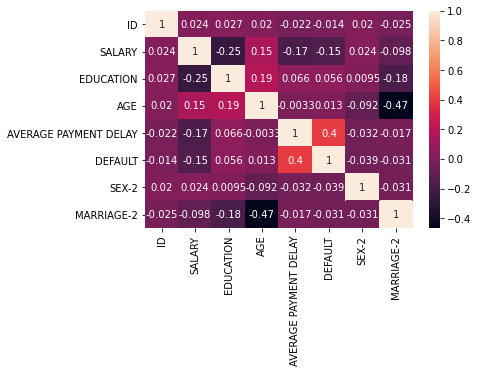

In [12]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

In [13]:
data.corr()

,ID,SALARY,EDUCATION,AGE,AVERAGE PAYMENT DELAY,DEFAULT,SEX-2,MARRIAGE-2
ID,1.000000,0.023510,0.027405,0.020221,-0.022250,-0.013733,0.020164,-0.024537
SALARY,0.023510,1.000000,-0.252313,0.151659,-0.172575,-0.153576,0.023998,-0.097990
EDUCATION,0.027405,-0.252313,1.000000,0.190031,0.065518,0.055502,0.009496,-0.176812
AGE,0.020221,0.151659,0.190031,1.000000,-0.003312,0.012983,-0.092140,-0.466317
AVERAGE PAYMENT DELAY,-0.022250,-0.172575,0.065518,-0.003312,1.000000,0.401692,-0.032099,-0.016809
DEFAULT,-0.013733,-0.153576,0.055502,0.012983,0.401692,1.000000,-0.038963,-0.031437
SEX-2,0.020164,0.023998,0.009496,-0.092140,-0.032099,-0.038963,1.000000,-0.031002
MARRIAGE-2,-0.024537,-0.097990,-0.176812,-0.466317,-0.016809,-0.031437,-0.031002,1.000000


#### The three most correlated features (both positive and negative)  to the DEFAULT feature gave a relatively good performance: SALARY, EDUCATION AND AVERAGE PAYMENT DELAY

## Split data: two-third for Train, one-third for Test

In [14]:
X = data.drop(['ID','DEFAULT','AGE','MARRIAGE-2','SEX-2'],axis = 1)
y = data['DEFAULT']

In [15]:
X.columns

Index(['SALARY', 'EDUCATION', 'AVERAGE PAYMENT DELAY'], dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

## Creating a Tree-based model with Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7434
           1       0.68      0.33      0.44      2190

    accuracy                           0.81      9624
   macro avg       0.75      0.64      0.66      9624
weighted avg       0.79      0.81      0.79      9624



## Performance evaluation

In [18]:
score = accuracy_score(y_pred, y_test)*100

print("The accuracy score achieved using Random Forest Classifer is: "+str(score)+" %")

The accuracy score achieved using Random Forest Classifer is: 81.20324189526184 %


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7434
           1       0.68      0.33      0.44      2190

    accuracy                           0.81      9624
   macro avg       0.75      0.64      0.66      9624
weighted avg       0.79      0.81      0.79      9624



In [20]:
print(confusion_matrix(y_test,y_pred))

[[7096  338]
 [1471  719]]


<AxesSubplot:>

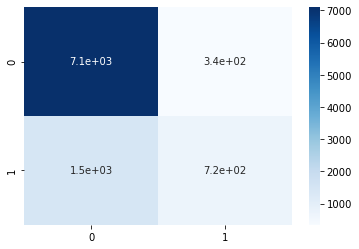

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True,cmap='Blues')

## Preprocessing for Model Deployment

In [22]:
final_dataset = data[['SALARY', 'EDUCATION', 'AVERAGE PAYMENT DELAY','DEFAULT']]

In [23]:
final_dataset

,SALARY,EDUCATION,AVERAGE PAYMENT DELAY,DEFAULT
0,20000.0,2,2,1
1,120000.0,2,-1,1
2,90000.0,2,-1,0
3,50000.0,2,-1,0
4,50000.0,2,-1,0
...,...,...,...,...
29158,220000.0,3,-1,0
29159,150000.0,3,-1,0
29160,30000.0,2,4,1
29161,80000.0,3,1,1


In [24]:
final_dataset.to_csv('Credit Default Clean Dataset.csv',index = False)

In [25]:
def input_to_dataframe(salary,education,avg_pay_delay):
    X_dataframe = pd.DataFrame([{'SALARY':salary,  'EDUCATION':education,'AVERAGE PAYMENT DELAY':avg_pay_delay}])
    return X_dataframe

In [26]:
teat = input_to_dataframe('8282','3','-1')

## Saving the model

In [27]:
import pickle
pickle.dump(classifier, open("model.sav", 'wb'))

In [28]:
loaded_model = pickle.load(open("model.sav", 'rb'))

In [29]:
loaded_model.predict(teat)

array([0], dtype=int64)

# Notes

### Achieving an overall accuracy score of 81% with just three (3) features is awesome, and it helps us with the  model explanability to a good extent.

### With more relevant features, we should be able to get a better performance. The following features may be relevant: loan amount, referrals, socio-demographic data, past transacion records, etc.

### From the classification report, the model performed extremely excellent (89%) in identifying potential non-defaulters, but is below average (44%) in identifying potential defaulters. This is most likely because imbalance 'DEFAULT' variable
